## Goal of this Notebook
Let's observe linear movements after a week's movements are observed

In [1]:
from stock_utils import *

# All Stocks

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             BAC
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



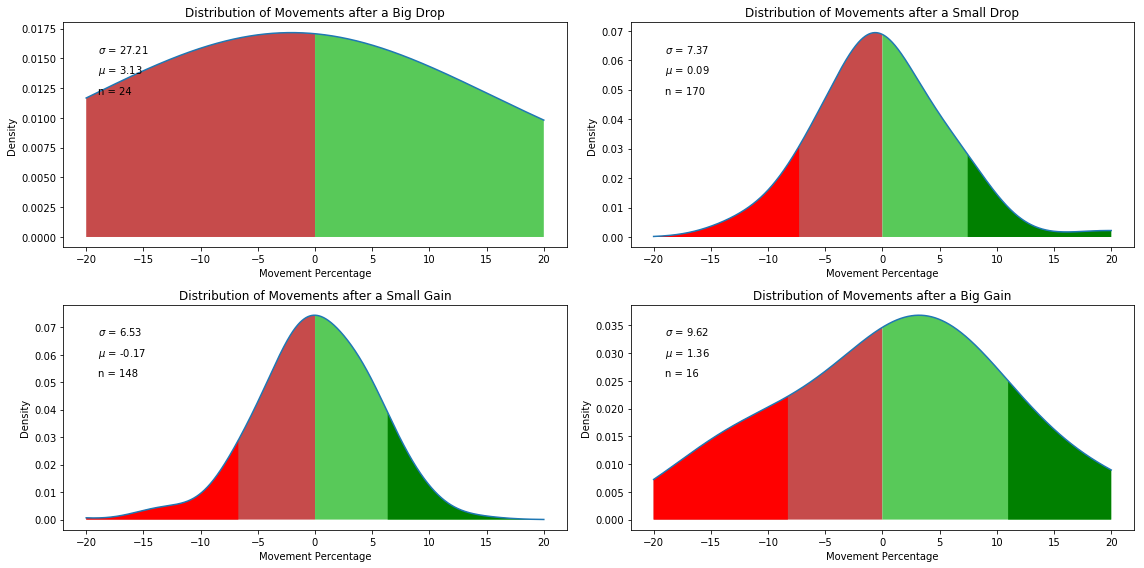

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             NVDA
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



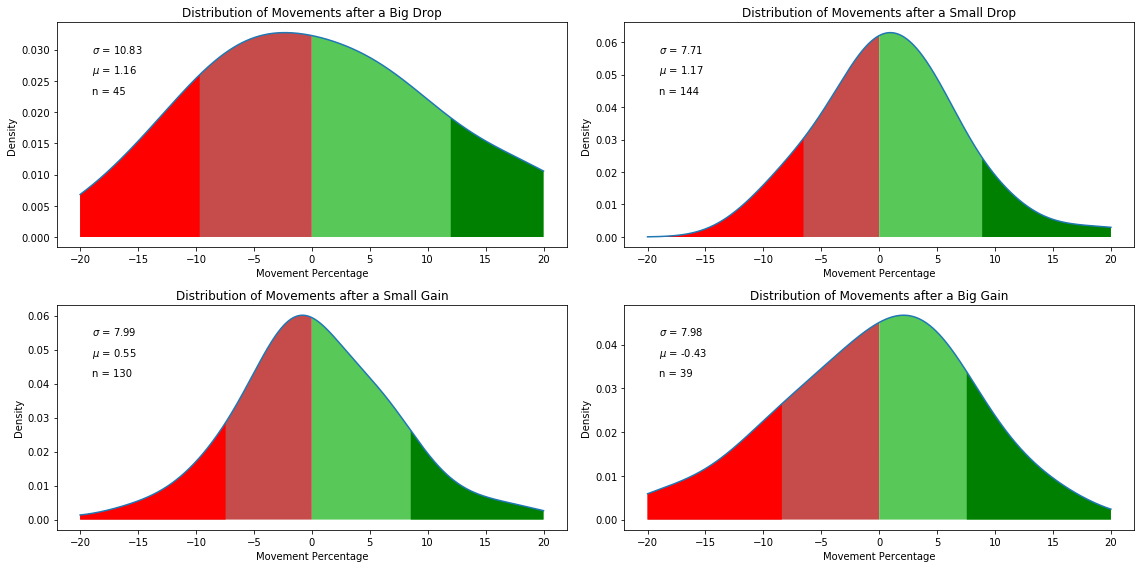

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             NKE
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



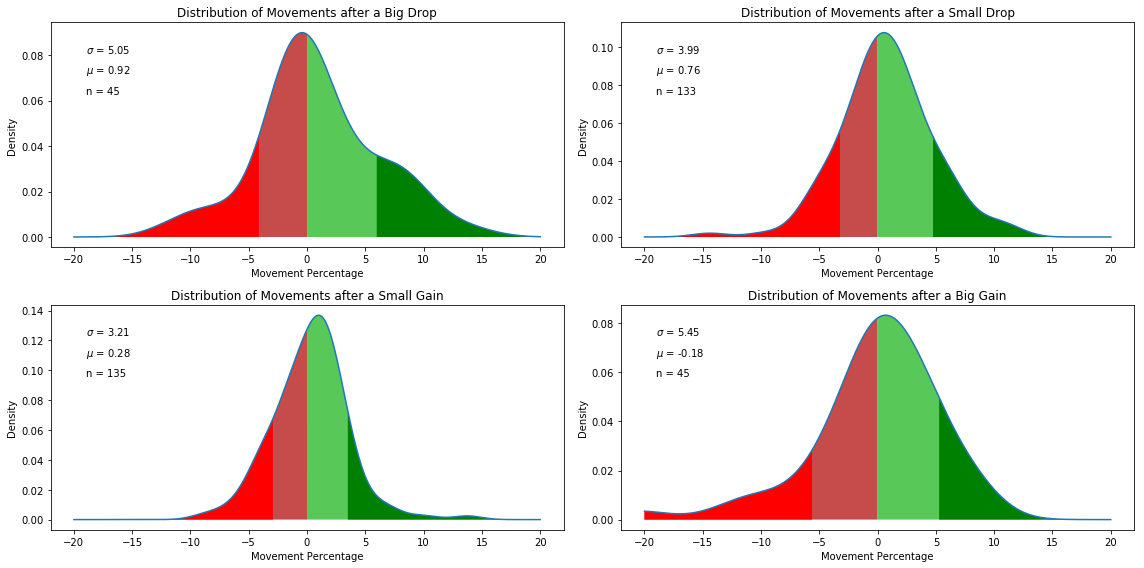

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             SBUX
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



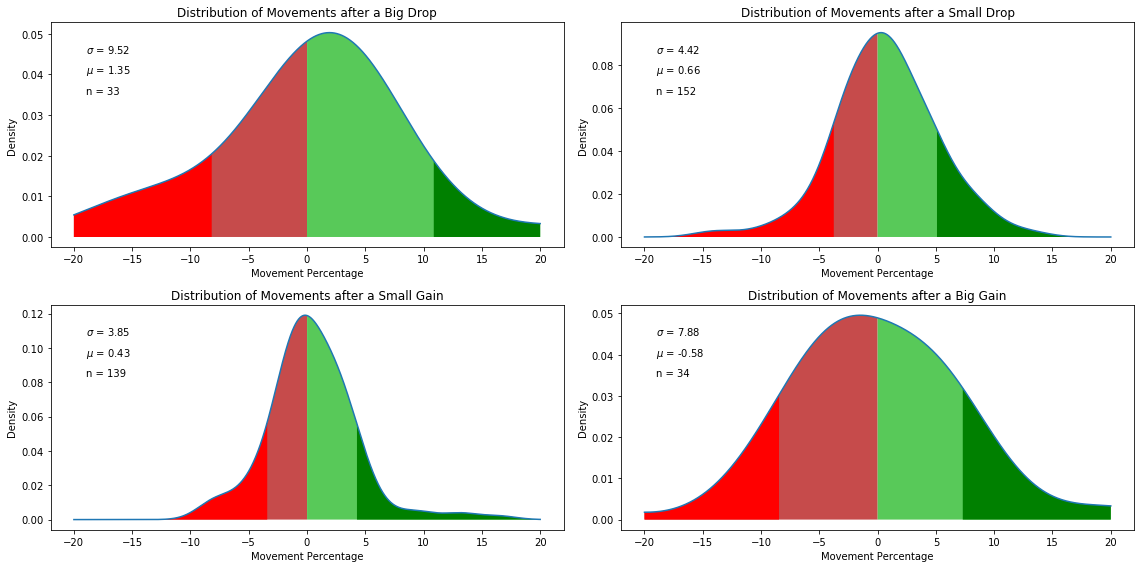

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             AMD
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



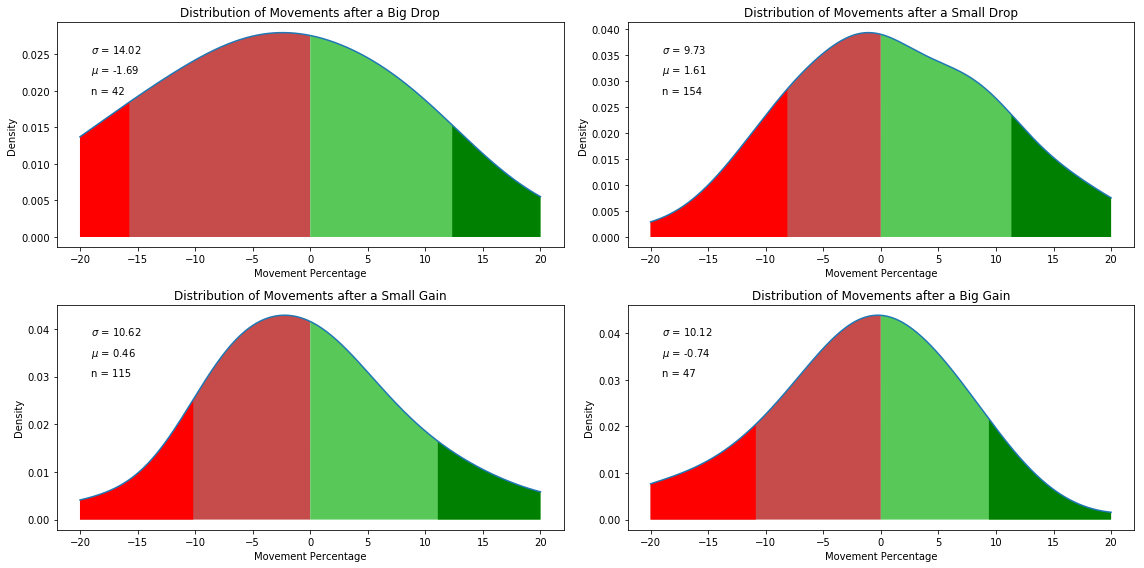

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             MU
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



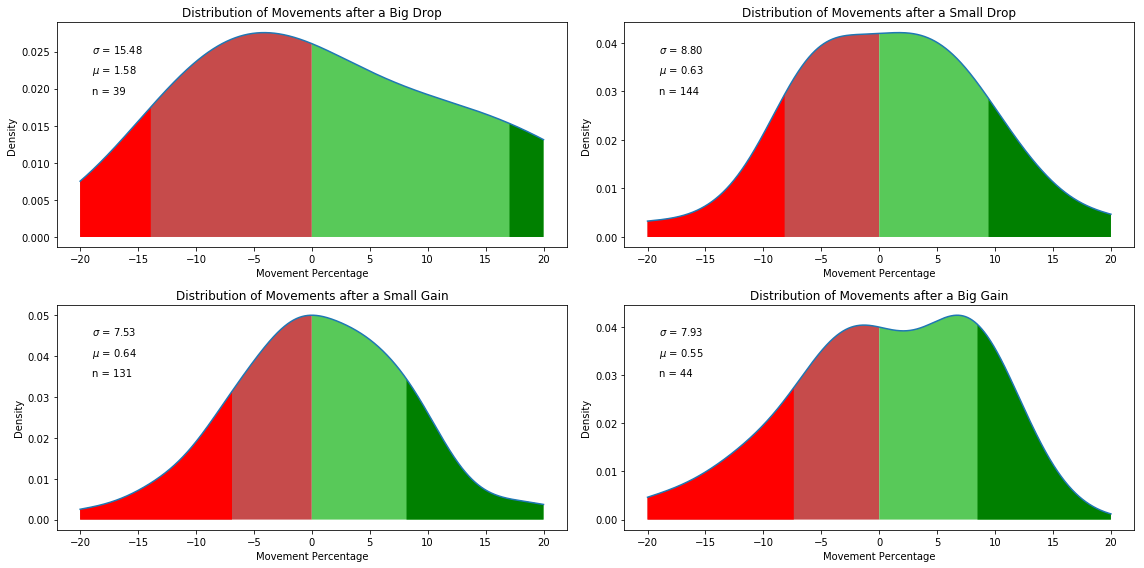

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             SPY
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



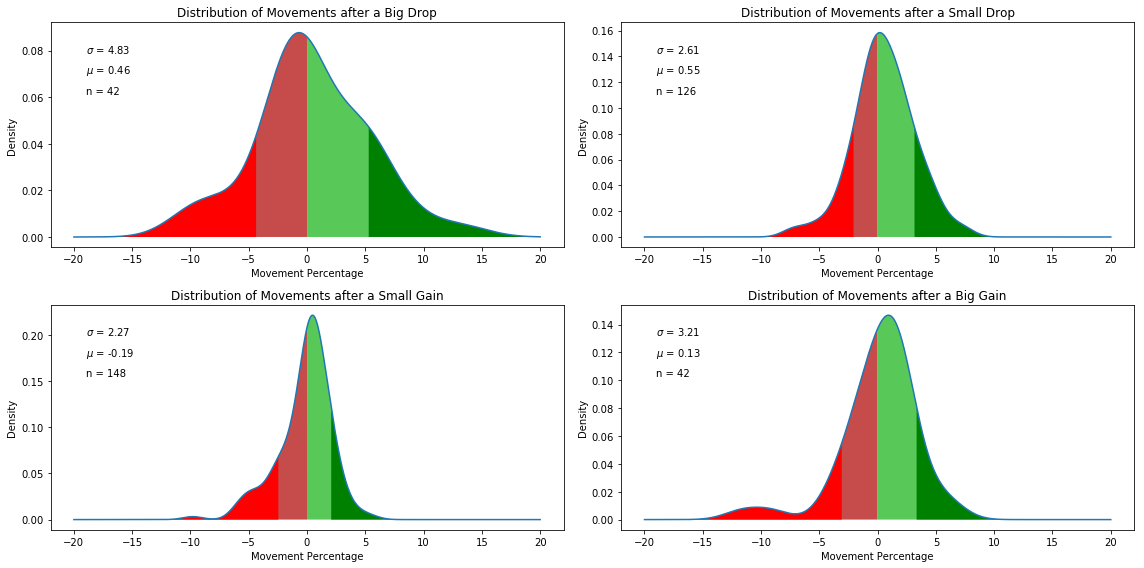

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             GOOG
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



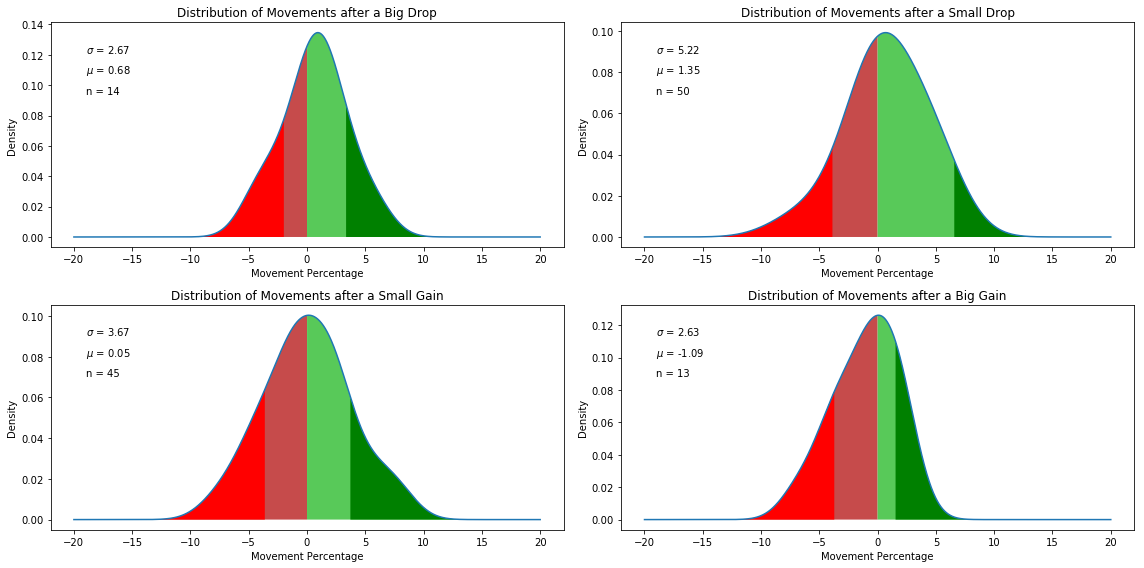

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             TSLA
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



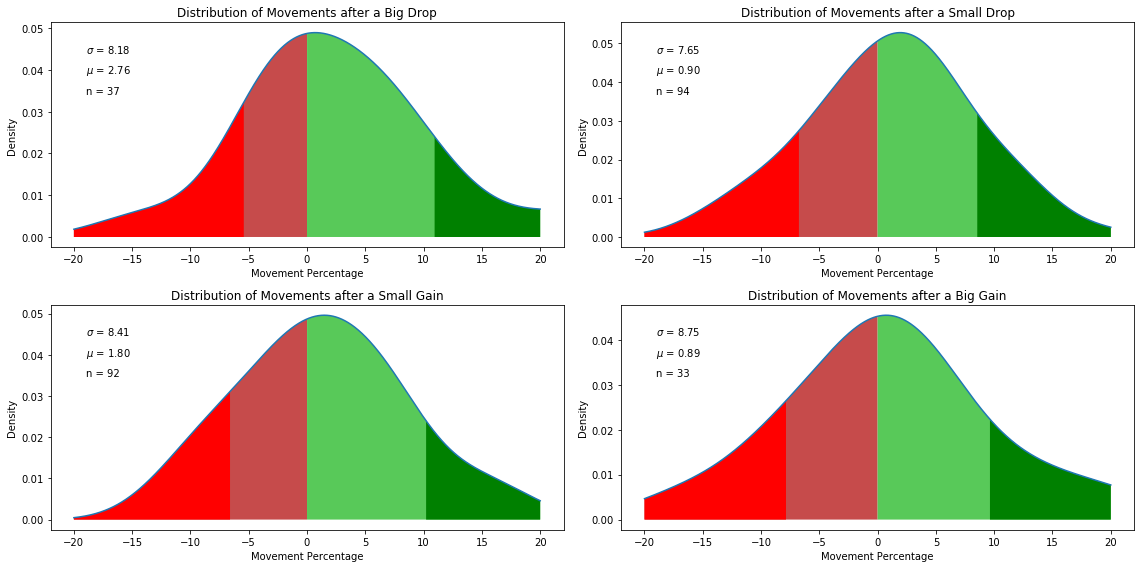

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             FB
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



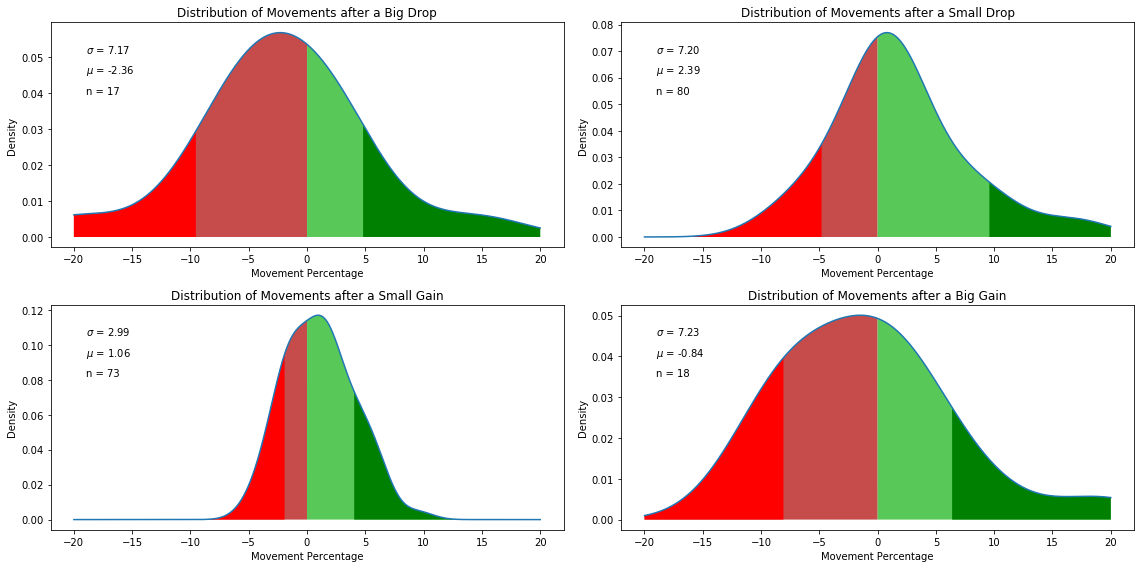

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
             INTC
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



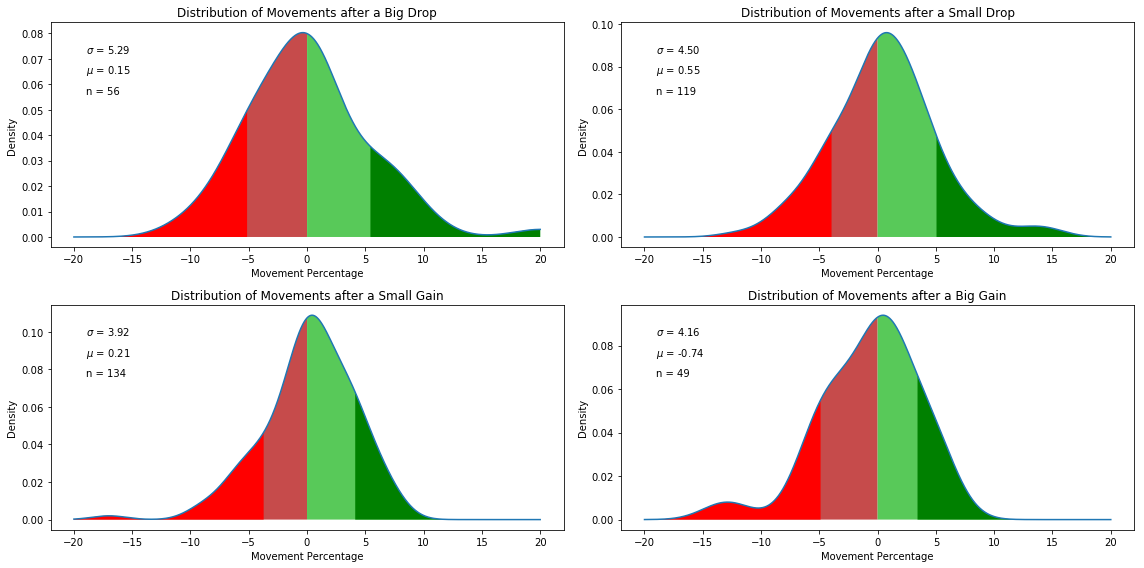

In [7]:
g = glob.glob('stock_data/*.csv')
all_cats = ['bd', 'sd', 'sg', 'bg']

for filename in g:
    df = pd.DataFrame()
    df = df.from_csv(filename)
    weekly_movements = get_price_movement_percentages(df, period=7)
    movement_categories = categorize_movements(weekly_movements)
    two_week_trends_linear = get_trends_linear(movement_categories, weekly_movements, 2)
    ticker = ticker_from_csv(filename)
    
    movements_after_category = []
    for cat in all_cats:
        movements_after_category.append(get_movements_after_trend(cat, two_week_trends_linear))
        
    print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')
    print('             ' + ticker)
    print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')
    print()
    plt.figure(figsize=(16,8))
    
    ## Big Drop
    plt.subplot(2, 2, 1)
    x = movements_after_category[0]
    n = len(movements_after_category[0])
    plot_gaussian_categorical(x, title="Distribution of Movements after a Big Drop", 
                              n_cats=4, n_data=n, x_min=-20, x_max=20)
    
    ## Small Drop
    plt.subplot(2, 2, 2)
    x = movements_after_category[1]
    n = len(movements_after_category[1])
    plot_gaussian_categorical(x, title="Distribution of Movements after a Small Drop", 
                              n_cats=4, n_data=n, x_min=-20, x_max=20)

    ## Small Gain
    plt.subplot(2, 2, 3)
    x = movements_after_category[2]
    n = len(movements_after_category[2])
    plot_gaussian_categorical(x, title="Distribution of Movements after a Small Gain", 
                              n_cats=4, n_data=n, x_min=-20, x_max=20)
    
    ## Big Gain
    plt.subplot(2, 2, 4)
    x = movements_after_category[3]
    n = len(movements_after_category[3])
    plot_gaussian_categorical(x, title="Distribution of Movements after a Big Gain", 
                              n_cats=4, n_data=n, x_min=-20, x_max=20)
    
    plt.tight_layout()
    plt.show()